In [29]:
import numpy as np

import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
disease = "breast cancer"
sens = 0.9
spec = 0.91

display(f"I am woman. I've been tested for {disease}. My result is positive. What is probability, that I have cancer?")
display(
    f"Under assumption that in whole population probability of having cancer probabililty of having {disease} is {prior}."
)
display(
    f" and test that has been carried out has sensivity={sens} and specificity={spec}"
)
display(f"PROBABILITY IS: {round(calc_bayes_with_factors(sens, spec, silent=False, prior=prior) * 100, 2)}%")

display(f"Second question: I was tested, and I was negative. What is probability, that I have {disease}?")
display(
    f"Under assumption that in whole population probability of having cancer probabililty of having {disease} is {prior}."
)
display(
    f" and test that has been carried out has sensivity={sens} and specificity={spec}"
)
display(f"PROBABILITY IS: {round(calc_bayes_with_factors_for_second_question(sens, spec, silent=False, prior=prior) * 100, 2)}%")


"I am woman. I've been tested for breast cancer. My result is positive. What is probability, that I have cancer?"

'Under assumption that in whole population probability of having cancer probabililty of having breast cancer is 0.01.'

' and test that has been carried out has sensivity=0.9 and specificity=0.91'

have_cancer_under_condition_proba: 0.09174311926605509
FPR: 0.08999999999999997


'PROBABILITY IS: 9.17%'

'Second question: I was tested, and I was negative. What is probability, that I have breast cancer?'

'Under assumption that in whole population probability of having cancer probabililty of having breast cancer is 0.01.'

' and test that has been carried out has sensivity=0.9 and specificity=0.91'

have_cancer_given_not_detected_probe: 0.0011087703736556156


'PROBABILITY IS: 0.1109%'

In [31]:
prior = 0.01  # a'priori we know, that 1% of woman have breast cancer
do_not_have_cancer_prior = 1 - prior

In [45]:
def calc_bayes_with_factors(sensivity = 0.9, specificity = 0.91, /, silent=True, prior=0.01):
    FPR = 1 - specificity  # FPR = FP / (FP + TN)  # 89 / (89 + 901)   from 3Blue1Brown example
    P_detected_positively_given_cancer = sensivity
    P_detected_positively_given_do_not_have_cancer = FPR
    have_cancer_under_condition_proba = prior * P_detected_positively_given_cancer \
        / (prior * P_detected_positively_given_cancer + do_not_have_cancer_prior * P_detected_positively_given_do_not_have_cancer)  # P(Cancer | +) = TP / (TP + FP) = PPV
    if not silent:
        print(f"have_cancer_under_condition_proba: {have_cancer_under_condition_proba}")
        print(f"FPR: {FPR}")
    return have_cancer_under_condition_proba

    # p_cancer_detected = n_cancer_detected / N
    # p_cancer_really_have = prior
    # # p_cancer_missed  - does this proba have sense in terms of "classical" probability? I think it is already Bayes proba :p
    # # p_cancer_detected_positively_truly - does this proba have sense in terms of "classical" probability? I think it is already Bayes proba :p
    # # p_cancer_detected_positively_falsly - does this proba have sense in terms of "classical" probability? I think it is already Bayes proba :p
    # p_cancer_do_not_have_truly = do_not_have_cancer_prior
    # # p_cancer_do_not_have_truly_and_not_detected - does this proba have sense in terms of "classical" probability? I think it is already Bayes proba :p
display(calc_bayes_with_factors(silent=False))

have_cancer_under_condition_proba: 0.09174311926605509
FPR: 0.08999999999999997


0.09174311926605509

In [64]:
def calc_bayes_with_factors_for_second_question(sensivity = 0.9, specificity = 0.91, /, silent=True, prior=0.01):   
    P_not_detected_given_cancer = 1 - sensivity
    TPR = sensivity  # = TP / (TP + FN)
    P_not_detected_given_have_not_cancer = specificity #  901 / 990  -> how many of people without cancer was tested negatively  from 3Blue1Brown example
    have_cancer_given_not_detected_proba = prior * P_not_detected_given_cancer \
        / (prior * P_not_detected_given_cancer + P_not_detected_given_have_not_cancer * do_not_have_cancer_prior)  # have_cancer_given_not_detected_proba =  1 / 902 from 3Blue1Brown example (because there was only one "hipek" that had cancer, that has not been detected and 901 "hipeks" that were negative and haven't got cancer -> 1 / (901 + 1))
    # have_cancer_given_not_detected_proba = false omission rate (FOR) -> https://en.wikipedia.org/wiki/Positive_and_negative_predictive_values
    if not silent:
        print(f"have_cancer_given_not_detected_probe: {have_cancer_given_not_detected_proba}")
    return have_cancer_given_not_detected_proba

    # p_cancer_detected = n_cancer_detected / N
    # p_cancer_really_have = prior
    # # p_cancer_missed  - does this proba have sense in terms of "classical" probability? I think it is already Bayes proba :p
    # # p_cancer_detected_positively_truly - does this proba have sense in terms of "classical" probability? I think it is already Bayes proba :p
    # # p_cancer_detected_positively_falsly - does this proba have sense in terms of "classical" probability? I think it is already Bayes proba :p
    # p_cancer_do_not_have_truly = do_not_have_cancer_prior
    # # p_cancer_do_not_have_truly_and_not_detected - does this proba have sense in terms of "classical" probability? I think it is already Bayes proba :p
display(calc_bayes_with_factors_for_second_question(silent=False))

have_cancer_given_not_detected_probe: 0.0011087703736556156


0.0011087703736556156

In [84]:
def I_am_positive_give_me_proba_I_have_cancer(row):
    return calc_bayes_with_factors(row["sensivity"], row["specificity"], prior=row["prior"])


def I_am_negative_give_me_proba_I_have_cancer(row):
    return calc_bayes_with_factors_for_second_question(row["sensivity"], row["specificity"], prior=row["prior"])


def prepare_data_for_plotting(foo):
    num = 10
    sens_vec = np.linspace(0, 0.9, num=num)
    df1 = pd.DataFrame.from_dict(
        {
            "sensivity": sens_vec
        }
    )
    spec_vec = np.linspace(0, 0.9, num=num)
    df2 = pd.DataFrame.from_dict(
        {
            "specificity": spec_vec
        }
    )

    df3 = df1.merge(df2, how="cross")

    prior_vec = np.linspace(0, 0.05, num=5)
    df4 = pd.DataFrame.from_dict(
        {
            "prior": prior_vec
        }
    )

    df = df4.merge(df3, how="cross")

    df["proba"] = df.apply(foo, axis=1)  # axis=1 means for each row
    return df

In [85]:
def plot_df(df, title):
    sns.scatterplot(data=df, x="sensivity", y="proba", hue="specificity", size="prior")
    plt.title(title)
    plt.show()

    sns.scatterplot(data=df, x="specificity", y="proba", hue="sensivity", size="prior")
    plt.title(title)
    plt.show()

    sns.scatterplot(data=df, x="prior", y="proba", hue="sensivity", size="specificity")
    plt.title(title)
    plt.show()

    sns.scatterplot(data=df, x="specificity", y="sensivity", hue="proba", size="prior")
    plt.title(title)
    plt.show()

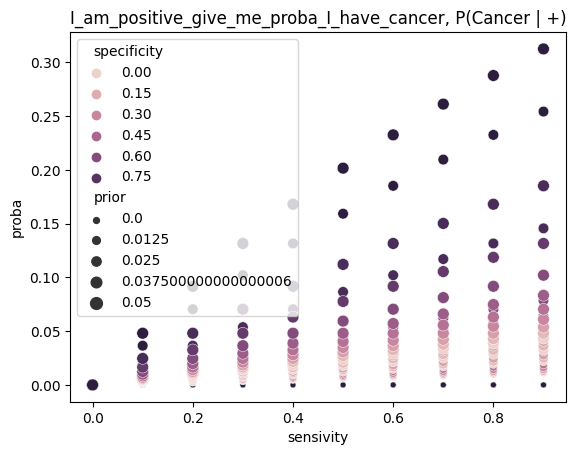

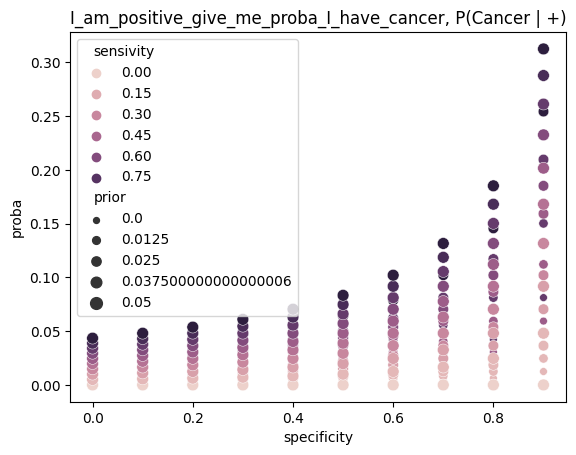

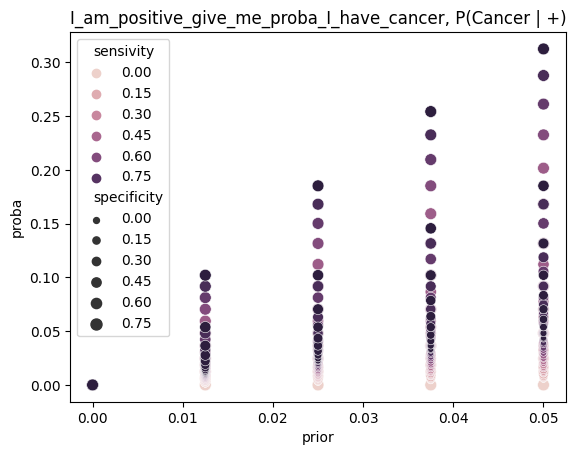

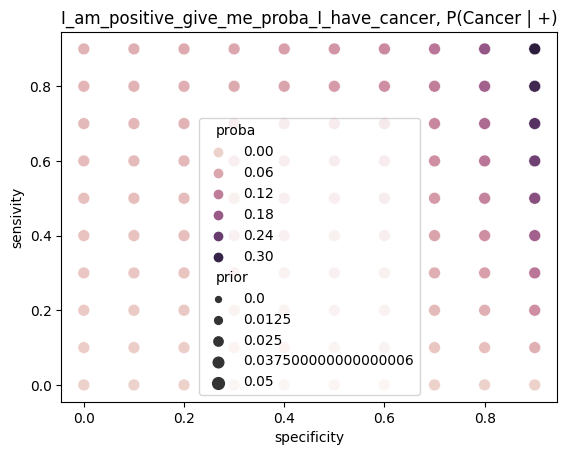

C:\Users\PF\AppData\Local\Temp\ipykernel_12428\3480569248.py:5: RuntimeWarning: invalid value encountered in double_scalars
  have_cancer_given_not_detected_proba = prior * P_not_detected_given_cancer \


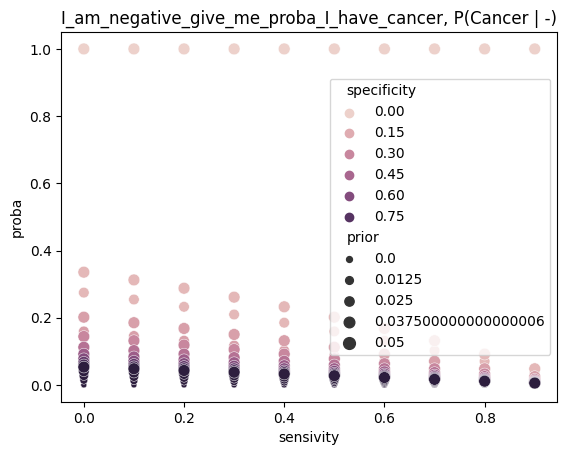

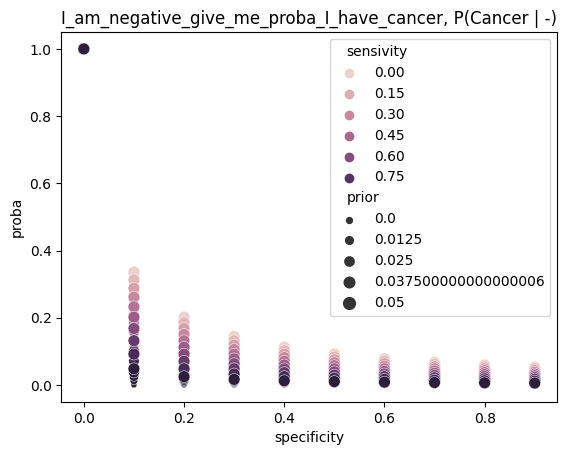

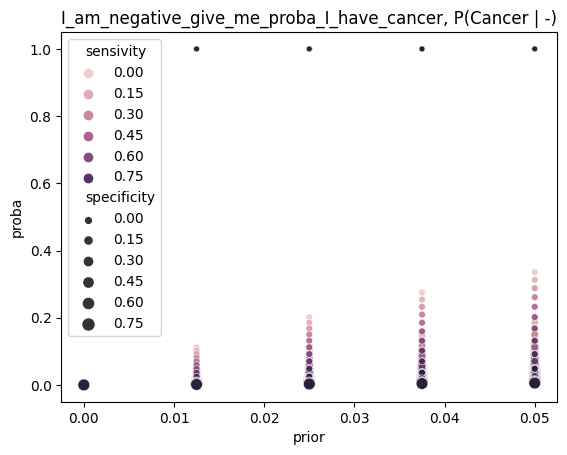

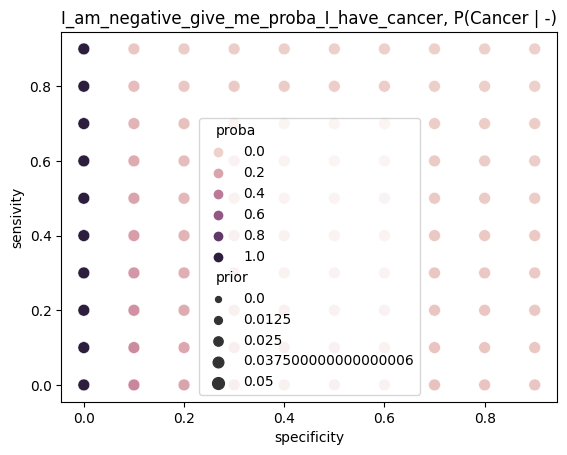

In [86]:
df_I_am_positive_give_me_proba_I_have_cancer = prepare_data_for_plotting(I_am_positive_give_me_proba_I_have_cancer)
plot_df(df_I_am_positive_give_me_proba_I_have_cancer, title="I_am_positive_give_me_proba_I_have_cancer, P(Cancer | +)")

df_I_am_negative_give_me_proba_I_have_cancer = prepare_data_for_plotting(I_am_negative_give_me_proba_I_have_cancer)
plot_df(df_I_am_negative_give_me_proba_I_have_cancer, title="I_am_negative_give_me_proba_I_have_cancer, P(Cancer | -)")

In [68]:
# https://www.youtube.com/watch?v=lG4VkPoG3ko
 
N = 1000

n_cancer_detected = 99  

n_cancer_really_have = 10
n_cancer_missed = 1  # false negatives ;((((
n_cancer_detected_positively_truly = 9  # true positives
n_cancer_detected_positively_falsly = n_cancer_detected - n_cancer_detected_positively_truly

n_cancer_do_not_have_truly = N - n_cancer_really_have
n_cancer_do_not_have_truly_and_not_detected = N - n_cancer_really_have - n_cancer_detected_positively_falsly

# Use in terms of "n"
sensivity = n_cancer_detected_positively_truly / n_cancer_really_have
specificity = n_cancer_do_not_have_truly_and_not_detected / n_cancer_do_not_have_truly
FPR = n_cancer_detected_positively_falsly / n_cancer_do_not_have_truly  # false_positives / all_negatives
# P(Have cancer | positively tested)  a.k.a. P(Cancer | +)
# P(Cancer | +) = TP / (TP + FP) a.k.a. precision a.k.a.  Positive Predicted Value (PPV) a.k.a. how many retrived examples are relevant?
have_cancer_under_condition_n_ver = n_cancer_detected_positively_truly / (n_cancer_detected_positively_truly + n_cancer_detected_positively_falsly)
print(have_cancer_under_condition_n_ver)
print(FPR)

likelihood_ratio = bayes_factor = sensivity / FPR  # P_plus_cancer / P_plus_no_cancer

0.09090909090909091
0.09090909090909091


### Differences in results are caused by that, specificity under condition specified in "n" mode MUST have different value than in "factor" mode